# Wczytanie bibliotek i wcześniej przygotowanego zestawu danych


In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics

In [2]:
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')

In [3]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,2,7,3


# Stworzenie danych wyjsciowych


In [4]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [5]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [6]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [7]:
data_preprocessed['Excessive Absenteeism'] = targets

In [8]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the week,Excessive Absenteeism
0,0,0,0,1,289,36,33,239.554,30,0,2,1,4,7,1,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0,7,1,0
2,0,0,0,1,179,51,38,239.554,31,0,0,0,2,7,2,0
3,1,0,0,0,279,5,39,239.554,24,0,2,0,4,7,3,1
4,0,0,0,1,289,36,33,239.554,30,0,2,1,2,7,3,0


# Sprawdzenie czy dane są równo rozłożone

In [9]:
targets.sum() / targets.shape[0]

0.45571428571428574

# Wyrzucenie danych niewpływających na model

In [10]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Day of the week',
                                            'Daily Work Load Average','Distance to Work'], axis = 1)

In [11]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Month Value,Excessive Absenteeism
0,0,0,0,1,289,33,30,0,2,1,7,1
1,0,0,0,0,118,50,31,0,1,0,7,0
2,0,0,0,1,179,38,31,0,0,0,7,0
3,1,0,0,0,279,39,24,0,2,0,7,1
4,0,0,0,1,289,33,30,0,2,1,7,0


In [12]:
data_with_targets.shape

(700, 12)

In [13]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

# Przeskalowanie danych

In [14]:
absenteeism_scaler =  StandardScaler()

In [15]:
class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [16]:
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [17]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [18]:
absenteeism_scaler = CustomScaler(columns_to_scale)
absenteeism_scaler.fit(unscaled_inputs)

C:\Users\Navson\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Navson\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CustomScaler(columns=['Transportation Expense', 'Age', 'Body Mass Index',
                      'Children', 'Pets', 'Month Value'],
             copy=None, with_mean=None, with_std=None)

In [19]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [20]:
scaled_inputs.shape

(700, 11)

In [21]:
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Month Value
0,0,0,0,1,1.005844,-0.536062,0.767431,0,0.880469,0.268487,0.182726
1,0,0,0,0,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690,0.182726
2,0,0,0,1,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690,0.182726
3,1,0,0,0,0.854936,0.405184,-0.643782,0,0.880469,-0.589690,0.182726
4,0,0,0,1,1.005844,-0.536062,0.767431,0,0.880469,0.268487,0.182726
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690,-0.388293
696,1,0,0,0,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663,-0.388293
697,1,0,0,0,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690,-0.388293
698,0,0,0,1,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690,-0.388293


# Podzielenie zbioru na treningowy i testowy


In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = .8)

# Trenowanie modelu 

In [23]:
reg = LogisticRegression()

In [24]:
reg.fit(x_train, y_train)

LogisticRegression()

# Wyniki modelu

In [25]:
reg.score(x_train, y_train)

0.7803571428571429

In [26]:
reg.score(x_test, y_test)

0.7571428571428571

# Stworzenie tabeli która pokazuje jak dane wpływają na model


In [27]:
reg.intercept_

array([-1.91963601])

In [28]:
reg.coef_

array([[ 2.93412321,  0.2882003 ,  3.18433044,  1.04976174,  0.70447501,
        -0.19303626,  0.31929736,  0.1072692 ,  0.3728446 , -0.29431941,
         0.02262798]])

In [29]:
feature_name = unscaled_inputs.columns.values

In [30]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,Reason_1,2.934123
1,Reason_2,0.288200
2,Reason_3,3.184330
3,Reason_4,1.049762
4,Transportation Expense,0.704475
5,Age,-0.193036
6,Body Mass Index,0.319297
7,Education,0.107269
8,Children,0.372845
9,Pets,-0.294319


In [31]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.919636
1,Reason_1,2.934123
2,Reason_2,0.288200
3,Reason_3,3.184330
4,Reason_4,1.049762
5,Transportation Expense,0.704475
6,Age,-0.193036
7,Body Mass Index,0.319297
8,Education,0.107269
9,Children,0.372845


In [32]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [33]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.184330,24.151112
1,Reason_1,2.934123,18.805008
4,Reason_4,1.049762,2.856970
5,Transportation Expense,0.704475,2.022784
9,Children,0.372845,1.451859
7,Body Mass Index,0.319297,1.376160
2,Reason_2,0.288200,1.334024
8,Education,0.107269,1.113234
11,Month Value,0.022628,1.022886
6,Age,-0.193036,0.824452


In [37]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
scaled_inputs, targets = shuffle(scaled_inputs, targets)
model  = LogisticRegression(solver = 'liblinear')
scores =  cross_val_score(model, scaled_inputs, targets, cv = 10)

<AxesSubplot:>

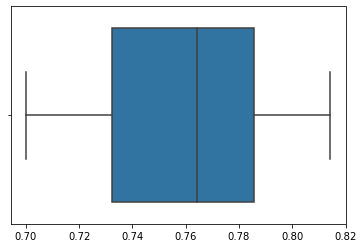

In [38]:
sns.boxplot(x=scores)

# Zapisanie modelu

In [ ]:
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [ ]:
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)